In [4]:
import numpy as np
import tensorflow as tf

corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

In [5]:
words = []

for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed

word2int = {}
int2word = {}

vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [14]:
print(word2int)

{'king': 0, 'is': 1, 'queen': 2, 'royal': 3, 'she': 4, 'the': 5, 'he': 6}


In [15]:
print(int2word)

{0: 'king', 1: 'is', 2: 'queen', 3: 'royal', 4: 'she', 5: 'the', 6: 'he'}


In [9]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')

sentences = []

for sentence in raw_sentences:
    sentences.append(sentence.split())

In [10]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [11]:
data = []

WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [12]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [13]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [19]:
# making placeholders for x_train and y_train

x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5 # you can choose your own number

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))

b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias

hidden_representation = tf.add(tf.matmul(x,W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))

b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [20]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10000

# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})

    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 5.6235828)
('loss is : ', 4.8451896)
('loss is : ', 4.2126918)
('loss is : ', 3.7175515)
('loss is : ', 3.3475909)
('loss is : ', 3.0847287)
('loss is : ', 2.9032929)
('loss is : ', 2.7766917)
('loss is : ', 2.6847231)
('loss is : ', 2.6145918)
('loss is : ', 2.5586898)
('loss is : ', 2.5124445)
('loss is : ', 2.47299)
('loss is : ', 2.4384522)
('loss is : ', 2.4075675)
('loss is : ', 2.3794634)
('loss is : ', 2.3535333)
('loss is : ', 2.3293471)
('loss is : ', 2.3065968)
('loss is : ', 2.2850592)
('loss is : ', 2.2645664)
('loss is : ', 2.2449906)
('loss is : ', 2.2262325)
('loss is : ', 2.2082126)
('loss is : ', 2.1908638)
('loss is : ', 2.1741316)
('loss is : ', 2.1579685)
('loss is : ', 2.1423335)
('loss is : ', 2.1271904)
('loss is : ', 2.1125066)
('loss is : ', 2.0982535)
('loss is : ', 2.0844049)
('loss is : ', 2.0709376)
('loss is : ', 2.0578296)
('loss is : ', 2.0450611)
('loss is : ', 2.0326142)
('loss is : ', 2.0204723)
('loss is : ', 2.0086203)
('loss is : ',

In [21]:
vectors = sess.run(W1 + b1)
print(vectors)

[[ 2.30734253 -0.12510145  1.73907828  0.51379776 -1.20142758]
 [-0.39803952  3.29252768  1.14517558 -0.6874181  -0.78460497]
 [ 2.1559391   2.0052433   2.64060688 -0.46060529 -1.2193687 ]
 [-0.93774945  0.71265185  0.16600764  2.31462216 -1.9495101 ]
 [-0.3830108   0.35694033  2.96021247  1.63319731 -2.51756454]
 [-1.74749601 -0.94091785  1.42010105 -1.62325561 -2.5734868 ]
 [-0.14237979 -0.1904968   3.35931444  1.55886734 -1.19665384]]


In [22]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1

    query_vector = vectors[word_index]

    for index, vector in enumerate(vectors):

        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):

            min_dist = euclidean_dist(vector, query_vector)
            min_index = index

    return min_index

In [23]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
she


In [24]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [25]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

('king', 0.22345103280126388)
('is', 0.91510805065733813)
('queen', -0.46062989671007587)
('royal', -0.1527115804095367)
('she', 0.97570839322608016)
('the', 0.99481177000493792)
('he', 0.16292524899455188)


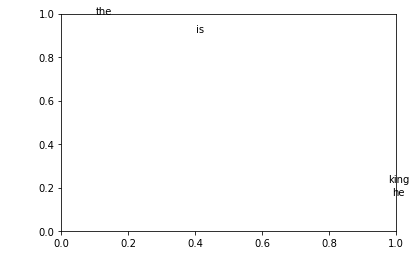

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))

plt.show()